# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [15]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set the seaborn default theme
sns.set()

In [16]:
data_df = pd.read_csv('university_enrollment_2306.csv')
data_df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


## Task 1 

In [17]:
# We use the .info() function to see not only the type of each column but also those that may have missing values.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


### 1.a
With the result of ``` info() ``` function above, we can see:
*   ``` course_id ``` is an integer so not nominal. We have convert it into ```string``` value.
*   ``` course_type ``` has the right data type.
*   ``` year ``` has the right data type.
*   ``` enrollment_count ``` has the right data type.
*   ``` pre_score ``` is an object, so not conitnuous, we have to convert it into ```float```.
*   ``` post_score ``` has the right data type but missing values.
*   ``` pre_requirement ``` has the right data type but also missing values.
*   ``` department  ``` has the right data type.

In [18]:
# Let how many missing values are in each columns
data_df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

### 1.b
we note that out of the ``` 8 ``` columns, only ``` 2 ``` of them have missing values. We have the result:
*  ```course_id```, ```course_type```, ```year```, ```enrollment_count```, ```pre_score``` and ```department``` do not have missing values.

However:
*   ``` post_score ``` has ``` 185 ``` missing values
*   ``` pre_requirement``` has ``` 89 ``` values

In [19]:
# Let display all nominal variables and see the unique values
# course_type
print('------- course type unique values -------')
display(data_df['course_type'].unique())
print()

#  pre_requirement
print('------- pre requirement unique values -------')
display(data_df['pre_requirement'].unique())
print()

# department
print('------- department unique values -------')
data_df['department'].unique()

------- course type unique values -------


array(['classroom', 'online'], dtype=object)


------- pre requirement unique values -------


array(['Beginner', 'None', nan, 'Intermediate'], dtype=object)


------- department unique values -------


array(['Science', 'Mathematics', 'Technology', 'Math', 'Engineering'],
      dtype=object)

In [20]:
# Convert course_id to str
data_df['course_id'] = data_df['course_id'].astype(str)

# Convert pre_score to float
data_df['pre_score'] = data_df['pre_score'].str.replace('-', '0')
data_df['pre_score'] = data_df['pre_score'].astype(float)

# Fill missing values in post_score with 0
data_df['post_score'] = data_df['post_score'].fillna(0)

# Fill missing values in pre_requirement with 'None'
data_df['pre_requirement'] = data_df['pre_requirement'].fillna('None')

# Format cause
replace_dic = {'Math': 'Mathematics'}
data_df['department'] = data_df['department'].replace(replace_dic)

### 1.c
what I did to make values match the description:
*   Convert ```course_id``` to ```str``` to make it nominal
*   Replace ```'-'``` in the ```pre_score``` with ```0``` and then convert it to ```float``` to make it continuous
*   Fill missing values in ```post_score``` with ```0```
*   Fill missing values in ```pre_requirement``` with ```'None'```
*   Replace ```Math``` by ```Mathematics``` in ```department```

## Task 2

[Text(0.5, 0, 'Enrollment count'),
 Text(0, 0.5, 'Number of enrollment count'),
 Text(0.5, 1.0, 'Distribution of enrollment count')]

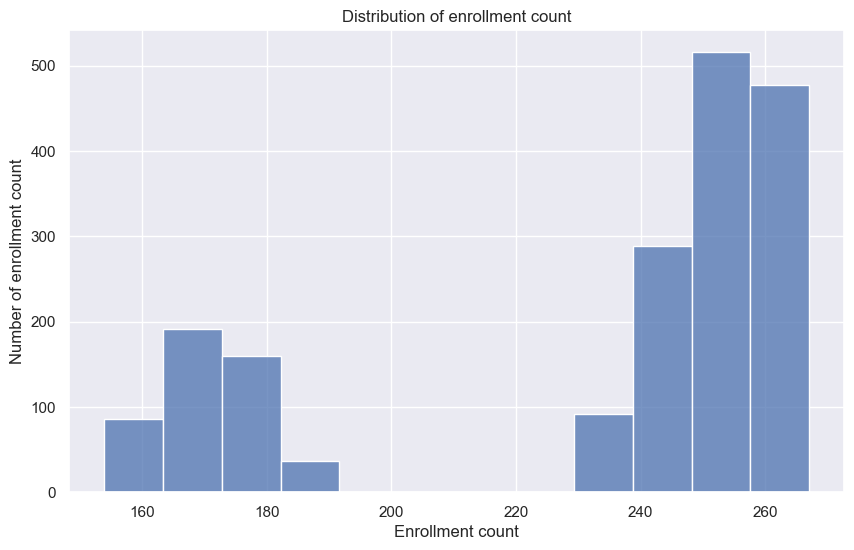

In [8]:
plt.figure(figsize=(10,6))
ax = sns.histplot(
    x = data_df['enrollment_count']
)

labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)

ax.set(
    xlabel = 'Enrollment count',
    ylabel = 'Number of enrollment count',
    title = 'Distribution of enrollment count'
)

The histogram shows the distribution of enrollment counts. The x-axis represents the range of enrollment counts, while the y-axis represents the frequency or count of occurrences.

From the histogram, we can observe the following:

*   The majority of enrollment counts fall within the range of approximately 230 to 270, with the highest frequency occurring between 250 and 260.

*   Enrollment counts above 190 and below 230 are non common and even non-existent.

Overall, the histogram provides a visual representation of the enrollment count distribution, highlighting the most frequent counts and the general shape of the data.

## Task 3

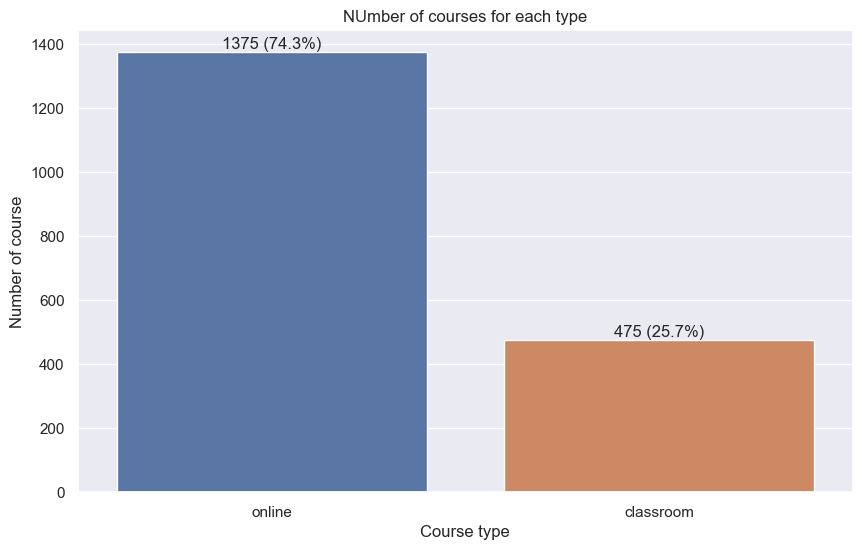

In [9]:
plt.figure(figsize=(10,6))

ax = sns.countplot(
    x = data_df['course_type'],
    order = data_df['course_type'].value_counts().index
)

ax.set(
    xlabel = 'Course type',
    ylabel = 'Number of course',
    title = 'NUmber of courses for each type'
)

abs_values = data_df['course_type'].value_counts() # here we count the number of provider for each transport type
rel_values = data_df['course_type'].value_counts(normalize=True).values * 100 # here is the percentage
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)] # Here we build a labels to show in the bar chart

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

We used bar chart to see the number of courses for each course type encoded with color for a better differenciation.

With the chart above, we can see that: 

## 3.a 
The majority of courses are online (```74.3%```) against a minority in the classroom (```25.7%```)

## 3.b
The observations were clearly unbalanced, with a high proportion of online courses and a low proportion of classroom courses.

## Task 4

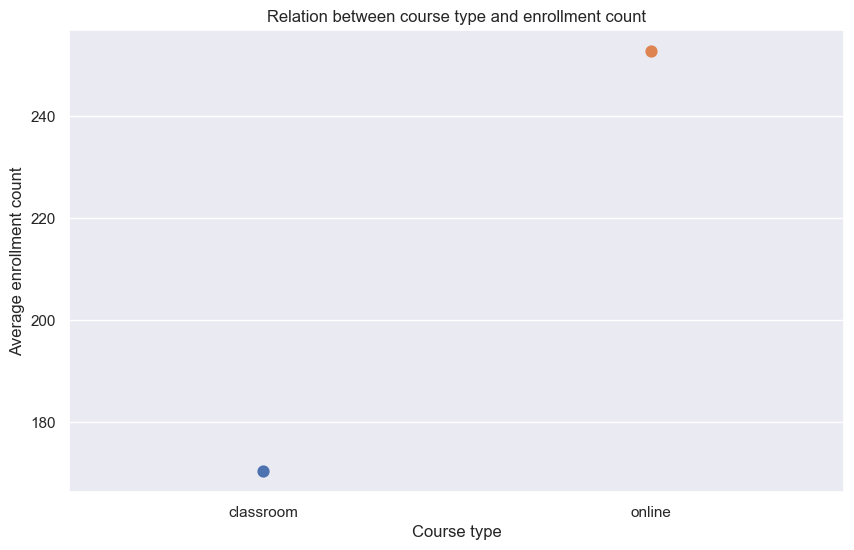

In [10]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(
    data = data_df, 
    y = 'enrollment_count', 
    x = 'course_type', 
    errorbar = None, 
    hue='course_type'
)

ax.set(
    xlabel = 'Course type',
    ylabel = 'Average enrollment count',
    title = 'Relation between course type and enrollment count'
)

ax.legend([],[], frameon=False)

plt.show()

Here, we used a pointplot, which is an alternative of scatter plot to show a relationship between categorical and countinous variable.

Wiht this chart, We can see, as we might expect, online courses have the highest average enrollment count.

So, on average, more people enroll for online courses than for classroom courses.

## Task 5

The problem of predicting how many students will enroll in a course is a regression problem. Regression is a type of machine learning problem where the goal is to predict a continuous numerical value based on input features. In this case, the number of students enrolling in a course is a continuous variable, and the objective is to estimate this value.

## Task 6

[Text(0, 0.5, 'Enrollment count'),
 Text(0.5, 1.0, 'Distribution of enrollment count')]

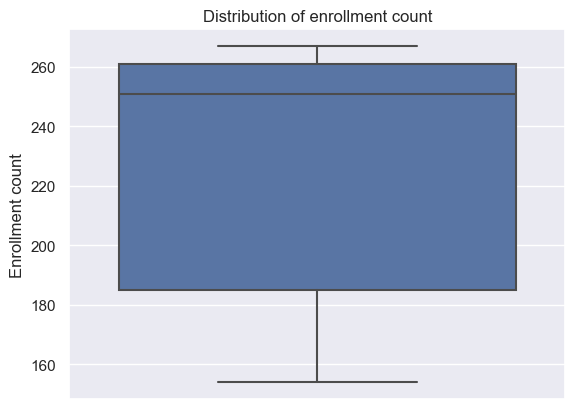

In [11]:
# check for outliers
ax = sns.boxplot(
    y = data_df['enrollment_count']
)

ax.set(
    ylabel = 'Enrollment count',
    title = 'Distribution of enrollment count'
)

In [12]:
# We remove course_id because it's not relevant for the prediction
model_df = data_df.drop(columns = 'course_id')

# One hot encode all the categorical features
cols_to_encode = [
    'course_type',
    'pre_requirement',
    'department'
]
model_df = pd.get_dummies(model_df, columns = cols_to_encode)

# Split the data into train and test
X = model_df.drop(columns = 'enrollment_count')
y = model_df['enrollment_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Scale some feature
cols_to_scale = [
  'pre_score',
  'post_score'
]

# Create a scaler
scaler = StandardScaler()

# Scale the train set
X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Scale the test set
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Create our model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)

LinearRegression()

For the baseline model, we choose ```Linear regression```.

## Task 7

In [13]:
# Create boosting model model
gbr = GradientBoostingRegressor()

# Fit the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

For the comparison model, we choose ```Gradient Boosting```.

## Task 8

Choosing linear regression as the model for predicting the number of enrollments in a course, can be justified for the following reasons:
*  ```Interpretability```: Linear regression provides interpretable coefficients that allow for a straightforward understanding of the impact of each feature on the number of enrollments. 
*   ```Model simplicity```: Linear regression is a relatively simple model compared to more complex algorithms like tree-based models or neural networks. It has fewer hyperparameters to tune and is less prone to overfitting. 
*   ```Dataset size```: Linear regression can perform well with smaller datasets, such as the 1850 entries provided. It is less likely to suffer from overfitting and can provide stable results even with limited training data.



Choosing the Gradient Boosting Regressor model can be justified for the following reasons:
*   ``` Handling complex relationships```: Gradient Boosting Regressor is a powerful algorithm that can capture complex and nonlinear relationships between features and the target variable. If the relationship between the features (e.g., course_type, pre_requirement, department) and the number of enrollments is intricate or contains interactions, gradient boosting can effectively capture and model those patterns.
*   ```Feature importance```: Gradient Boosting Regressor provides a measure of feature importance, which can be valuable for understanding the factors that contribute most to the number of enrollments. By examining the feature importance scores, we can identify which features have the most significant impact on the predictions.
*   ```Ensemble learning```: Gradient Boosting Regressor is an ensemble learning method that combines multiple weak learners (decision trees) to create a strong predictive model. It leverages the strengths of individual trees and iteratively improves predictions.


## Task 9

In [14]:
# Make the prediction for the base line model
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate our model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared = False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"The RMSE for a base linear regression model is : {rmse_lr} and the MAE is : {mae_lr}")
print()


# Make the prediction for the comparison model
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate our model
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared = False)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f"The RMSE for a Gradient Boosting model is : {rmse_gbr} and the MAE is : {mae_gbr}")

The RMSE for a base linear regression model is : 0.36804575970010767 and the MAE is : 0.17340128881260838

The RMSE for a Gradient Boosting model is : 0.38814227466726836 and the MAE is : 0.2070050197825807


For the models' evaluation we used ```02``` metrics:
*   ```Root Mean Squared Error (RMSE)```: RMSE is the square root of ```MSE```( is one of the most widely used metrics for regression tasks. It calculates the average squared difference between the predicted and actual values. MSE penalizes larger errors more heavily, making it sensitive to outliers.). It provides an interpretable metric in the same unit as the target variable. RMSE is helpful for understanding the average deviation between predicted and actual values.
*   ```Mean Absolute Error (MAE)```: MAE calculates the average absolute difference between the predicted and actual values. Unlike MSE, it does not square the errors, making it less sensitive to outliers. MAE provides a more intuitive understanding of the average prediction error.

## Task 10

Based on those 02 metrics, we can see that Linear regression model perform better that Gradient boosting regressor on both metrics.



This can be explain with the fact that: 
*  Linear regression can be effective when the data is relatively simple and exhibits minimal nonlinear patterns or interactions between features while Gradient boosting is generally more suited for complex, nonlinear relationships and can capture more intricate patterns.
*  Linear regression can perform well when there is limited training data. It has fewer hyperparameters to tune and is less prone to overfitting compared to gradient boosting, which is more powerful but can be more prone to overfitting with limited data.

However, it's important to note that gradient boosting is a highly flexible and powerful algorithm that can often outperform linear regression, especially in complex and nonlinear scenarios. 

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam